# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [1]:
%matplotlib inline
import lightroot

15/04/2018 13:28:50 INFO:loaded lightroot


# 1 Manually set file templates for processing

In [2]:
pth  ="C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/"
lightroot.SETTINGS["stack_files"] = pth+"Run0192_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0192_tp{}_MIP.tif"

# 2 Loading frames

In [3]:
# sample_time_frame =71
# stack = lightroot.io.get_stack(sample_time_frame)
# lightroot.io.plotimg(stack)

# 3 Full frame detection routine

15/04/2018 13:28:54 INFO(0):Stack loaded from C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/Run0192_tp000.tif
15/04/2018 13:28:55 INFO(0):using low band range for 2d data from 95,99, 50 data percentile [0.25, 0.434, 0.17]
15/04/2018 13:28:55 INFO(0):projecting 2d mask to 3d mask...
15/04/2018 13:28:55 INFO(0):using low band range for 3d data from 95,99, 50 data percentile [0.122, 0.262, 0.057]
15/04/2018 13:28:55 INFO(0):using final filter from percentile low band range 0.262
15/04/2018 13:28:55 INFO(0):checking shine @ 91713.00
15/04/2018 13:28:55 WARN(0):bright frame detected. removing bottom
15/04/2018 13:28:56 INFO(0):extracted root region with volume 9334440 with non-zero 0.98%
15/04/2018 13:28:56 INFO(0):clipped root, offset at [(369, 355, 756, 757)]
15/04/2018 13:28:59 INFO(0):sharpening done. percentage non-zero is 2.80%
15/04/2018 13:29:02 INFO(0):Transform back to original ref frame using clipped bounding blox


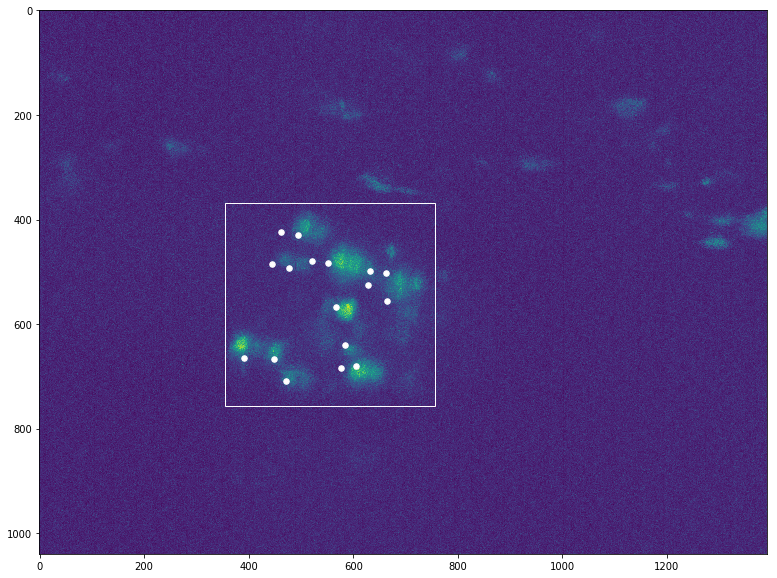

In [4]:
stack = lightroot.io.get_stack(0)
out = []
blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=False, sharpen_iter=2, overlay_original_id=11,out=out) #sharpen_iter=2, isolate_iter=2,
lightroot.io.overlay_blobs(stack,blob_centroids,out)

# 4 Running batch process

In [ ]:
#lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

# 5 Low-level steps

## isolating roots via lowband

### 2d

In [ ]:
stack = lightroot.io.get_stack(10)
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack)
lightroot.io.plotimg(stack)

### 3d

In [ ]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

In [ ]:
stack = lightroot.blobs.sharpen(stack, iterations=1)
lightroot.io.plotimg(stack)

## isolating blobs in data

In [ ]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

In [ ]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
# display results
import pandas as pd
im = stack.copy()


def peak_centroids(im, size=10, min_distance=10):
    image_max = ndi.maximum_filter(im, size=size, mode='constant')
    coordinates = peak_local_max(im, min_distance=min_distance)
    return pd.DataFrame(coordinates,columns=["z", "y", "x"])

blob_centroids = peak_centroids(im)
lightroot.io.overlay_blobs(stack,blobs_centroids)

## marking centroids

In [ ]:
blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)

In [ ]:
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm